In [1]:
from IPython.display import Image

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
pwd

'/Users/emani/Downloads/Projects'

In [35]:
Cluster=pd.read_csv('/Users/emani/Downloads/Employee_Compensation_SF.csv')
Cluster.head()

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2016,1,Public Protection,DAT,District Attorney,311.0,Municipal Attorneys' Association,8100,Legal & Court,...,49919,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,Calendar,2013,5,Culture & Recreation,ART,Arts Commission,790.0,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",...,1225,84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,Calendar,2015,4,Community Health,DPH,Public Health,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,...,34873,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,Fiscal,2015,4,Community Health,DPH,Public Health,250.0,"SEIU - Health Workers, Local 1021",2200,Medical & Dental,...,51145,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,Fiscal,2014,5,Culture & Recreation,REC,Recreation and Park Commission,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,...,48705,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


In [36]:
Cluster.shape

(291825, 22)

In [37]:
Cluster.isnull().sum()

Year Type                   0
Year                        0
Organization Group Code     0
Organization Group          0
Department Code             0
Department                  0
Union Code                 43
Union                      43
Job Family Code            45
Job Family                 45
Job Code                    0
Job                         0
Employee Identifier         0
Salaries                    0
Overtime                    0
Other Salaries              0
Total Salary                0
Retirement                  0
Health/Dental               0
Other Benefits              0
Total Benefits              0
Total Compensation          0
dtype: int64

In [38]:
Cluster.dtypes

Year Type                   object
Year                         int64
Organization Group Code      int64
Organization Group          object
Department Code             object
Department                  object
Union Code                 float64
Union                       object
Job Family Code             object
Job Family                  object
Job Code                    object
Job                         object
Employee Identifier          int64
Salaries                   float64
Overtime                   float64
Other Salaries             float64
Total Salary               float64
Retirement                 float64
Health/Dental              float64
Other Benefits             float64
Total Benefits             float64
Total Compensation         float64
dtype: object

In [39]:
col_name=Cluster.columns
for i in col_name:
    print(i,'has :',Cluster[i].nunique(),"Unique values")

Year Type has : 2 Unique values
Year has : 4 Unique values
Organization Group Code has : 7 Unique values
Organization Group has : 7 Unique values
Department Code has : 54 Unique values
Department has : 54 Unique values
Union Code has : 69 Unique values
Union has : 73 Unique values
Job Family Code has : 56 Unique values
Job Family has : 55 Unique values
Job Code has : 1133 Unique values
Job has : 1139 Unique values
Employee Identifier has : 52059 Unique values
Salaries has : 214513 Unique values
Overtime has : 108176 Unique values
Other Salaries has : 147465 Unique values
Total Salary has : 265962 Unique values
Retirement has : 200963 Unique values
Health/Dental has : 92759 Unique values
Other Benefits has : 243798 Unique values
Total Benefits has : 275671 Unique values
Total Compensation has : 284433 Unique values


In [40]:
Cluster.describe()

,Year,Organization Group Code,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
count,291825.000000,291825.000000,291782.000000,291825.000000,291825.000000,291825.000000,291825.000000,291825.000000,291825.000000,291825.000000,291825.000000,291825.000000,291825.000000
mean,2014.325061,2.977051,489.506076,26917.830316,63210.172887,4406.877440,3781.032870,71398.083196,12937.728957,8921.893732,4644.276407,26503.899096,97901.982292
std,1.032265,1.577771,333.761136,15548.201987,44660.462305,11079.405928,7697.665317,52224.214099,9785.064808,4900.318083,3787.907010,16800.143147,67777.549152
min,2013.000000,1.000000,1.000000,1.000000,-68771.780000,-12308.660000,-19131.100000,-68771.780000,-30621.430000,-2940.470000,-10636.500000,-21295.150000,-74082.610000
25%,2013.000000,2.000000,216.000000,13444.000000,23281.920000,0.000000,0.000000,25276.010000,3549.540000,4318.170000,1587.190000,9604.500000,35817.450000
50%,2014.000000,2.000000,535.000000,27003.000000,62519.120000,0.000000,697.080000,67847.870000,13167.730000,11966.610000,4349.090000,30316.690000,98022.370000
75%,2015.000000,4.000000,790.000000,40401.000000,92910.710000,2766.580000,4621.480000,103148.090000,19570.330000,12801.790000,6829.480000,38720.820000,142058.420000
max,2016.000000,7.000000,990.000000,53794.000000,515101.800000,227313.620000,342802.630000,515101.800000,105052.980000,21872.800000,35157.630000,141043.640000,653498.150000


In [41]:
Cluster.Year.unique()

array([2016, 2013, 2015, 2014])

In [42]:
Cluster.Union.unique()

array(["Municipal Attorneys' Association",
       'SEIU - Miscellaneous, Local 1021',
       'SEIU - Human Services, Local 1021',
       'SEIU - Health Workers, Local 1021',
       'Prof & Tech Engineers - Miscellaneous, Local 21',
       "Police Officers' Association", "Deputy Sheriffs' Association",
       'Laborers, Local 261',
       'Transport Workers - Transit Operators, Local 250-A',
       'Prof & Tech Engineers - Personnel, Local 21',
       'Theatrical and Stage Employees, Local 16',
       'Plumbers and Pipefitters, Local 38',
       'SEIU - Staff and Per Diem Nurses, Local 1021',
       'Painters, Local 1176', 'Miscellaneous Unrepresented Employees',
       'Stationary Engineers, Local 39',
       'Teamsters - Miscellaneous, Local 856',
       'Firefighters - Miscellaneous, Local 798',
       'Municipal Executive Association - Court',
       'Electrical Workers, Local 6', 'Automotive Machinists, Local 1414',
       'Municipal Executive Association - Miscellaneous',
       "

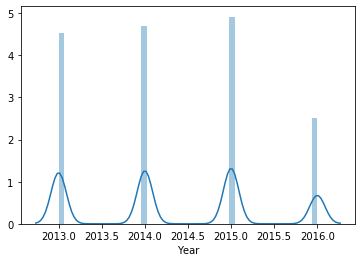

In [43]:
sns.distplot(Cluster['Year'])
plt.show()

In [44]:
print("Skewness: %f" % Cluster['Year'].skew())
print("Kurtosis: %f" % Cluster['Year'].kurt())

Skewness: 0.143671
Kurtosis: -1.157610


In [45]:
from sklearn.cluster import KMeans

In [46]:
kmeans=KMeans(n_clusters=3)

In [47]:
Cluster.columns

Index(['Year Type', 'Year', 'Organization Group Code', 'Organization Group',
       'Department Code', 'Department', 'Union Code', 'Union',
       'Job Family Code', 'Job Family', 'Job Code', 'Job',
       'Employee Identifier', 'Salaries', 'Overtime', 'Other Salaries',
       'Total Salary', 'Retirement', 'Health/Dental', 'Other Benefits',
       'Total Benefits', 'Total Compensation'],
      dtype='object')

In [53]:
Cluster1 = Cluster.drosns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()p(['Year Type','Organization Group','Department Code','Department',
                         'Union','Job Family Code','Job Family','Job Code','Job'], axis=1)

In [54]:
Cluster1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291825 entries, 0 to 291824
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Year                     291825 non-null  int64  
 1   Organization Group Code  291825 non-null  int64  
 2   Union Code               291782 non-null  float64
 3   Employee Identifier      291825 non-null  int64  
 4   Salaries                 291825 non-null  float64
 5   Overtime                 291825 non-null  float64
 6   Other Salaries           291825 non-null  float64
 7   Total Salary             291825 non-null  float64
 8   Retirement               291825 non-null  float64
 9   Health/Dental            291825 non-null  float64
 10  Other Benefits           291825 non-null  float64
 11  Total Benefits           291825 non-null  float64
 12  Total Compensation       291825 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 28.9 MB


In [65]:
Cluster1['Union Code'] = Cluster1['Union Code'].fillna(Cluster1['Union Code'].mean())

In [68]:
Cluster1.isnull().sum()

Year                       0
Organization Group Code    0
Union Code                 0
Employee Identifier        0
Salaries                   0
Overtime                   0
Other Salaries             0
Total Salary               0
Retirement                 0
Health/Dental              0
Other Benefits             0
Total Benefits             0
Total Compensation         0
dtype: int64

In [72]:
cluster_model = kmeans.fit(Cluster1)

In [73]:
cluster_model.labels_

array([2, 0, 1, ..., 1, 0, 1], dtype=int32)

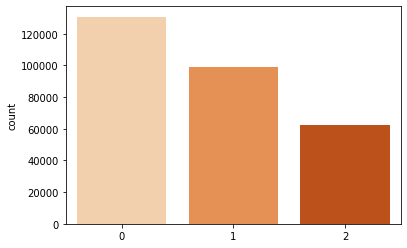

In [74]:
sns.countplot(x=kmeans.labels_, palette='Oranges')
plt.show()

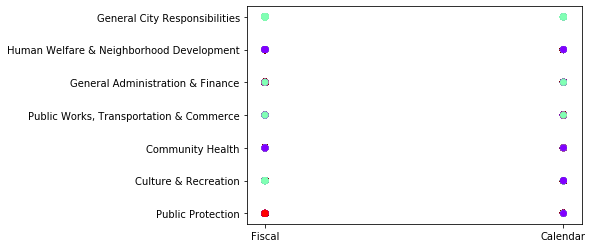

In [77]:
plt.scatter(Cluster.iloc[:,0].values,Cluster.iloc[:,3].values, c=kmeans.labels_, cmap="rainbow")
plt.show()